# Caso de estudio Test SAT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
import seaborn as sns
%matplotlib inline

# Estudio del test SAT
Vamos a analizar un estudio que recogió datos de los resultados del test SAT (un test estándar
que se utiliza ampliamente para admisiones en USA) por estados, combinados con otros datos.
El test SAT se utiliza para medir el rendimiento de los estudiantes y, compararlo con el gasto en
educación. La idea es la de tratar de entender si hay una relación entre el gasto y los resultados.
En este caso, el estudio es de un sólo año y se compara entre los diferentes estados de Estados
Unidos.
Es importante resaltar que el tema del impacto del gasto en los resultados es un tema recurrente
en política educativa, y genera debates sobre la verdadera incidencia del gasto. Hay quien
sostiene que no es el gasto lo importante, sino cómo se gasta el dinero, mientras que otras
posiciones tienden a intentar igualar el gasto en favor de la igualdad de oportunidades.

# variables:
state: Nombre de los estados;
expend: Gasto actual por alumno, en promedio de asistencia diaria en escuelas públicas, primarias y secundarias, 1994-95 (en miles de dólares); 
ratio: Promedio del ratio alumno/maestro en escuelas de primaria y secundaria públicas, otoño 1994; 
salary: Salario anual promedio de maestros en escuelas públicas de primaria y secundaria entre 194-95, en miles de dólares; frac: Porcentaje de estudiantes elegibles que realizaron el SAT, 1994-95  verbal: Promedio en calificación verbal de la 
puntuación SAT, 1994-95;
math: Promedio en matemáticas de la puntuación SAT, 1994-95; 
sat: Promedio total de la puntuación SAT, 1994-95;


# Se pide:
 Analizar gráficamente si los scores del test tienen una escala similar y los componentes
tienen relación;
 Ordenar los datos y obtener los estados que más (y menos) gastan y los que mejores (y
peores) resultados obtienen;
 Analizar de manera intuitiva con gráficos si hay relación entre las variables que indican
resultados (las del test SAT) y las variables que indican gasto;
 Utilizar correlaciones y un modelo lineal básico como exploración numérica de ese tipo
de relación gasto/resultados. ¿Cuál es la conclusión aparente?

In [3]:
df_sat =pd.read_table("sat.dat.txt",delim_whitespace=True)
df =pd.DataFrame(df_sat)
df
df.columns=['State','expend','ratio','salary','frac','verbal','math','sat']


#  Información de Datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   49 non-null     object 
 1   expend  49 non-null     float64
 2   ratio   49 non-null     float64
 3   salary  49 non-null     float64
 4   frac    49 non-null     int64  
 5   verbal  49 non-null     int64  
 6   math    49 non-null     int64  
 7   sat     49 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.2+ KB


# Verificar valor missing

In [18]:
df.isna().sum()

State     0
expend    0
ratio     0
salary    0
frac      0
verbal    0
math      0
sat       0
dtype: int64

In [19]:
df.isnull().sum()

State     0
expend    0
ratio     0
salary    0
frac      0
verbal    0
math      0
sat       0
dtype: int64

In [4]:
# Normalización de la Datos

#df_norm=df[df.columns[[1,2,3,4,5,6,7]]]
#df_norm =df_norm.apply(minmax_scale)
#df_norm

# Sumarización de las datos

In [98]:
df.describe()

,expend,ratio,salary,frac,verbal,math,sat
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,5.935878,16.851020,34.904122,35.795918,456.448980,508.183673,964.632653
std,1.359443,2.289298,5.978742,26.746479,35.195917,40.397336,75.034352
min,3.656000,13.800000,25.994000,4.000000,401.000000,443.000000,844.000000
25%,4.992000,15.200000,30.922000,9.000000,427.000000,474.000000,897.000000
50%,5.817000,16.600000,33.987000,29.000000,448.000000,496.000000,944.000000
75%,6.436000,17.600000,38.555000,64.000000,488.000000,540.000000,1033.000000
max,9.774000,24.300000,50.045000,81.000000,516.000000,592.000000,1107.000000


# Analizar gráficamente si los scores del test tienen una escala similar e relación entre variables.

In [ ]:
sns.distplot(df_norm['math'],kde=True)

In [30]:
max_verbal=df['verbal'].max()
print("Max verbal=",max_verbal)

media_verbal=round(df['verbal'].mean(),)
print("Media Verbal=",media_verbal)

min_verbal=df['verbal'].min()
print("Min verbal=",min_verbal)

Max verbal= 516
Media Verbal= 456
Min verbal= 401


In [29]:
max_math=df['math'].max()
print("Max math=",max_math)

media_math=round(df['math'].mean(),)
print("Media math=",media_math)

min_math=df['math'].min()
print("Min math=",min_math)

Max math= 592
Media math= 508
Min math= 443


In [30]:
max_sat=df['sat'].max()
print("Max sat=",max_sat)

media_sat=round(df['sat'].mean(),)
print("Media sat=",media_sat)

min_sat=df['sat'].min()
print("Min sat=",min_sat)

Max sat= 1107
Media sat= 965
Min sat= 844


# Análise Gráfica

[Text(0.5, 0, 'Pontuación Verbal')]

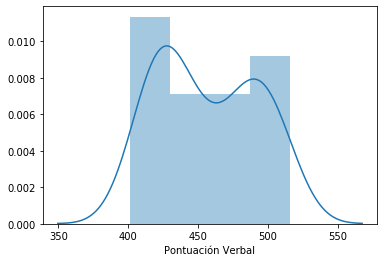

In [110]:
plot_hist=sns.distplot(df['verbal'],kde=True)
plot_hist.set(xlabel='Pontuación Verbal')



[Text(0.5, 0, 'Pontuación Math')]

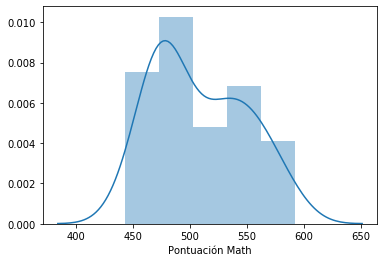

In [108]:
plot_hist=sns.distplot(df['math'],kde=True)
plot_hist.set(xlabel='Pontuación Math')


[Text(0.5, 0, 'Pontuación Sat')]

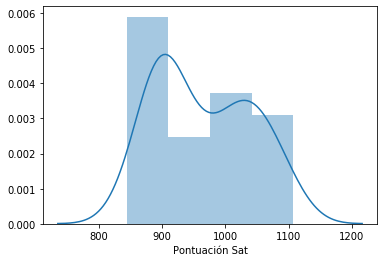

In [107]:
plot_hist=sns.distplot(df['sat'],kde=True)
plot_hist.set(xlabel='Pontuación Sat')


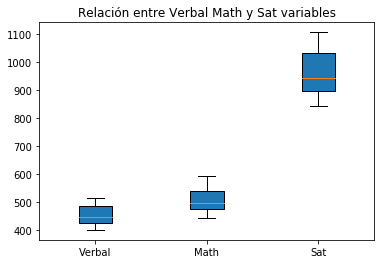

In [92]:
verbal= df['verbal']
math=df['math']
sat=df['sat']
box_plot_data=[verbal,math,sat]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Verbal','Math','Sat'])
plt.title("Relación entre Verbal Math y Sat variables")
plt.show()


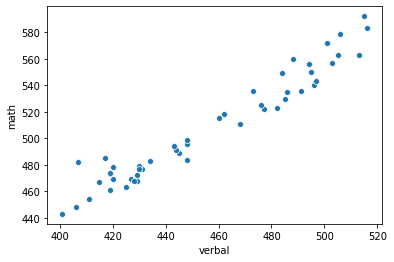

In [115]:
sns.scatterplot(x='verbal',y='math',data=df)

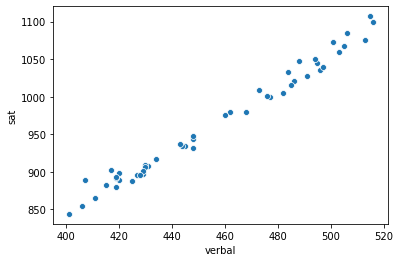

In [116]:
sns.scatterplot(x='verbal',y='sat',data=df)

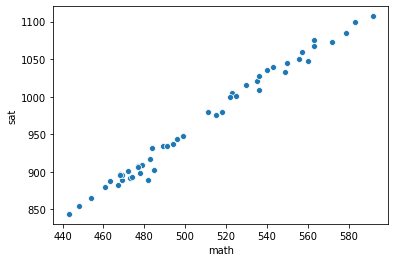

In [117]:
sns.scatterplot(x='math',y='sat',data=df)

 #### Discusión:
Tenga en cuenta que a través del histograma las variables verbal y math tienen la misma escala, mientras que esto no se nota para la variable sat.
Hicimos un diagrama de caja para analizar mejor las 3 variables, notamos que los valores mínimo, promedio y máximo están más cerca entre las variables verbal y math que sat. También se debe tener en cuenta que el puntaje promedio de Sat en matemática es más alto que el puntaje verbal promedio de las notas pero por debajo del puntaje promedio total de Sat.
La pantalla del histograma muestra que los valores están más concentrados o más cerca del valor mínimo para ambas 3 variables y también puede reforzar la visualización a través de un diagrama de caja que indica claramente que la línea mediana está más cerca de los valores mínimos. También descubrí que los datos no tienen una distribución normal, por lo que se deben elegir pruebas no paramétricas para futuros análisis.

A través de gráficos de puntos, notamos que existe una relación muy fuerte entre el puntaje promedio de Sat en matemáticas con el puntaje promedio total Sat en relación con el puntaje promedio de Sat en matemáticas con el promedio verbal de puntajes y el promedio verbal de puntajes con el puntaje promedio total de Sat. A medida que el puntaje promedio total de sat aumenta, el puntaje promedio de Sat en matemáticas también crece significativamente.

# Análisis de Estados con más y menos gasto por alumno

In [170]:
df2=df.iloc[:,[0,1]]
df3=df2.sort_values(['State','expend']).sort_values("expend", ascending=False)

index =[x for x in  range(1,len(df3)+1)]
df3['index']=index
df3.set_index('index',inplace = True)
df3


,State,expend
index,,
1,New Jersey,9.774
2,New York,9.623
3,Alaska,8.963
4,Connecticut,8.817
5,Rhode Island,7.469
6,Massachusetts,7.287
7,Maryland,7.245
8,Pennsylvania,7.109
9,Delaware,7.030


In [161]:
df4=df.sort_values(['State','expend']).sort_values("expend", ascending=False)

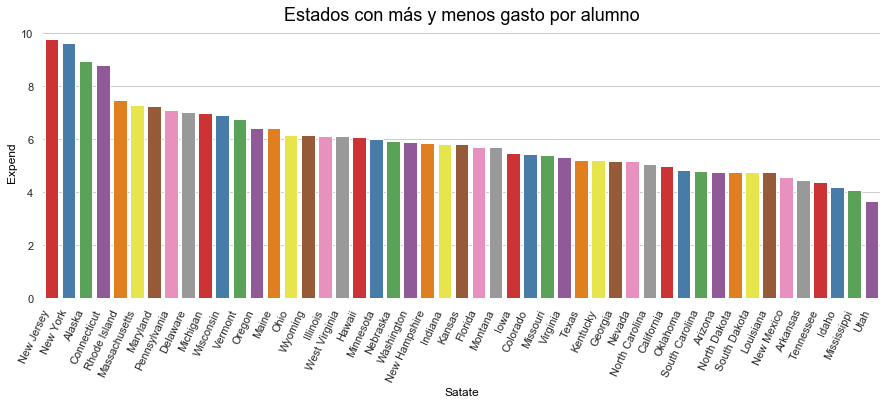

In [165]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
g = sns.barplot(x="State", y="expend", data=df4, palette='Set1')
g.axes.set_title('Estados con más y menos gasto por alumno', fontsize=18,color="black",alpha=2)
g.set_xlabel("Satate", size = 12,color="black")
g.set_ylabel("Expend", size = 12,color="black")
sns.despine(left=True, bottom=True)
g.set_xticklabels(g.get_xticklabels(),rotation=65,horizontalalignment='right')
plt.show()



### Discusión:


Observamos a través de la tabla y el análisis gráfico que los tres estados con más gasto actual por estudiante son New Jersey ,New Yourk y Alaska, mientras que el estado con el gasto más pequeño es Utah con un promedio de $ 3656.

# Análisis de Estados con más y menos gasto por maestro

In [174]:
df5=df.iloc[:,[0,3]]
df5=df5.sort_values(['State','salary']).sort_values("salary", ascending=False)
index =[x for x in  range(1,len(df5)+1)]
df5['index']=index
df5.set_index('index',inplace = True)
df5

,State,salary
index,,
1,Connecticut,50.045
2,Alaska,47.951
3,New York,47.612
4,New Jersey,46.087
5,Pennsylvania,44.510
6,Michigan,41.895
7,California,41.078
8,Massachusetts,40.795
9,Rhode Island,40.729


In [176]:
df6=df.sort_values(['State','salary']).sort_values("salary", ascending=False)

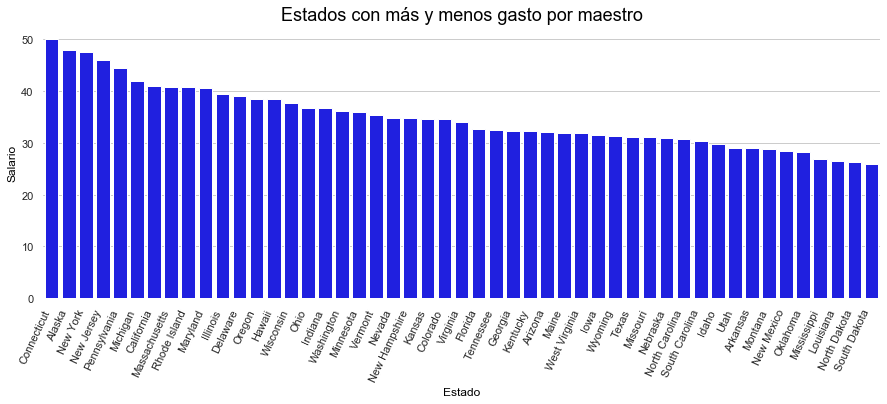

In [178]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
g = sns.barplot(x="State", y="salary", data=df4, color='blue')
g.axes.set_title('Estados con más y menos gasto por maestro', fontsize=18,color="black",alpha=2)
g.set_xlabel("Estado", size = 12,color="black")
g.set_ylabel("Salario", size = 12,color="black")
sns.despine(left=True, bottom=True)
g.set_xticklabels(g.get_xticklabels(),rotation=65,horizontalalignment='right')
plt.show()

 #### Discusión:

Observamos que a través del análisis tabular y gráfico, los mismos estados que tuvieron el mayor gasto en alonos son los que también tuvieron con los maestros, y South Dakota es el estado que gasta menos en los maestros con un promedio de $ 25,994.

# Análisis de rendimiento estatal con SAT más alto y más bajo

In [186]:
df6=df.iloc[:,[0,7]]
df6=df6.sort_values(['State','sat']).sort_values("sat", ascending=False)
index =[x for x in  range(1,len(df5)+1)]
df6['index']=index
df6.set_index('index',inplace = True)
df6

,State,sat
index,,
1,North Dakota,1107
2,Iowa,1099
3,Minnesota,1085
4,Utah,1076
5,Wisconsin,1073
6,South Dakota,1068
7,Kansas,1060
8,Nebraska,1050
9,Illinois,1048


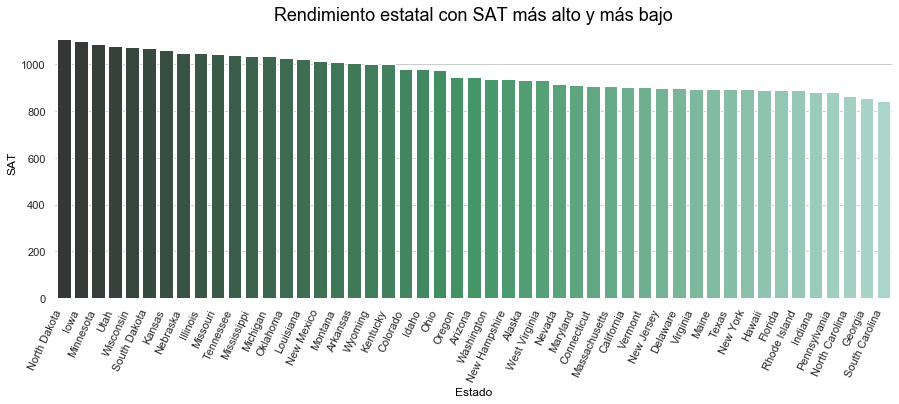

In [194]:
df7=df.sort_values(['State','sat']).sort_values("sat", ascending=False)
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
g = sns.barplot(x="State", y="sat", data=df7,palette="BuGn_d")
g.axes.set_title('Rendimiento estatal con SAT más alto y más bajo', fontsize=18,color="black",alpha=2)
g.set_xlabel("Estado", size = 12,color="black")
g.set_ylabel("SAT", size = 12,color="black")
sns.despine(left=True, bottom=True)
g.set_xticklabels(g.get_xticklabels(),rotation=65,horizontalalignment='right')
plt.show()

#### Discusión:

Por increíble que parezca, notamos a través de la tabla y el análisis gráfico que aquí el escenario se ha revertido. Los estados que tenían más gastos en maestros y estudiantes tenían puntajes más bajos en sat, mientras que estados como Utah, south Dakota, North Dakota, que tenían menos gastos tanto en estudiantes como en maestros, tenían mejores puntajes por sat.

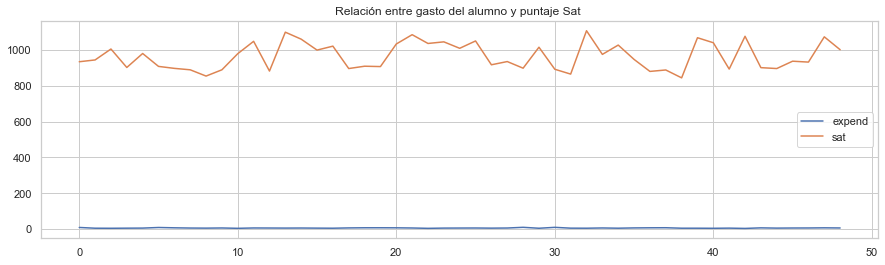

In [260]:
df[['expend', 'sat']].plot(figsize=(15, 4), title='Relación entre gasto del alumno y puntaje Sat ', grid=True)

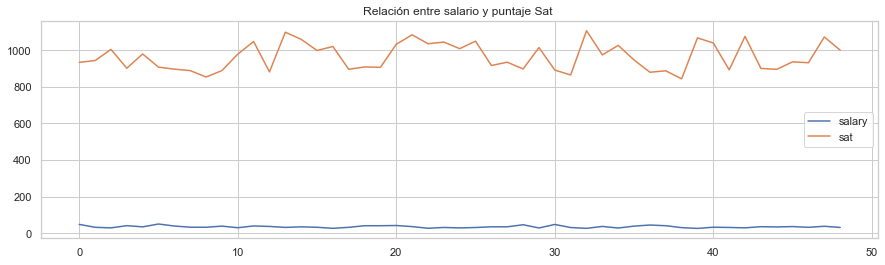

In [259]:
df[['salary', 'sat']].plot(figsize=(15, 4), title='Relación entre salario y puntaje Sat ', grid=True)

#### Discusión:

Notamos a partir de estos dos gráficos que ambas líneas están muy aisladas entre sí, lo que justifica una relación débil entre las 3 variables. Pero calculemos la correlación entre ellos y las gráficas de la relación entre ellos para sacar una mejor conclusión.

# Análisis de correlación

In [253]:
round(df['expend'].corr(df['sat']),3)

-0.369

In [252]:
round(df['salary'].corr(df['sat']),3)

-0.434

In [5]:
round(df['salary'].corr(df['math']),3)

-0.396

In [6]:
round(df['expend'].corr(df['math']),3)

-0.339

In [7]:
round(df['expend'].corr(df['verbal']),3)

-0.397

In [8]:
round(df['salary'].corr(df['verbal']),3)

-0.471

Text(0.5, 6.79999999999999, 'Expend')

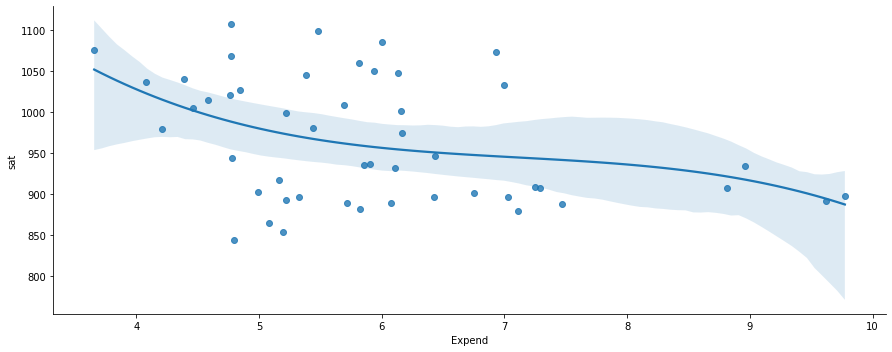

In [11]:
lm = sns.lmplot('expend', 'sat', data=df, aspect=2.5, order=3)
lm.ax.set_xlabel('Expend')

Text(0.5, 8.95999999999998, 'Salary')

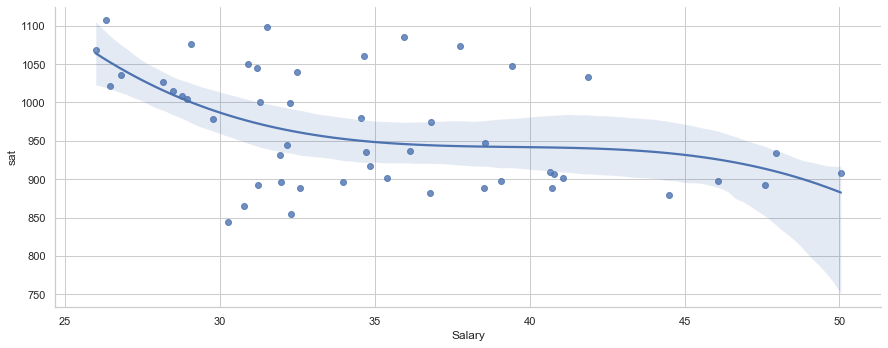

In [257]:

lm = sns.lmplot('salary', 'sat', data=df, aspect=2.5, order=3)
lm.ax.set_xlabel('Salary')

Text(0.5, 6.79999999999999, 'Expend')

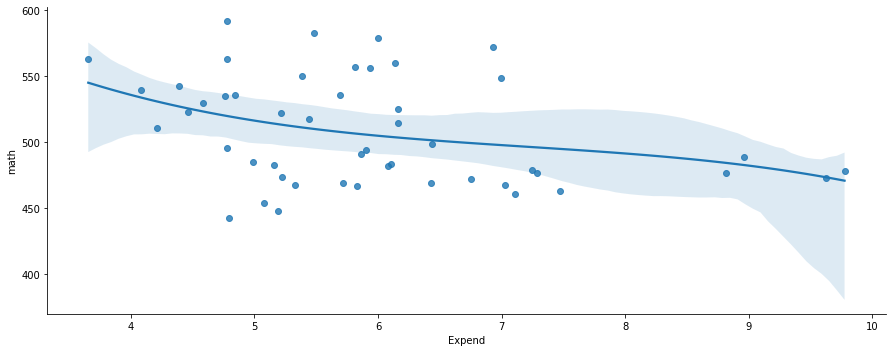

In [12]:
lm = sns.lmplot('expend', 'math', data=df, aspect=2.5, order=3)
lm.ax.set_xlabel('Expend')

Text(0.5, 6.79999999999999, 'Expend')

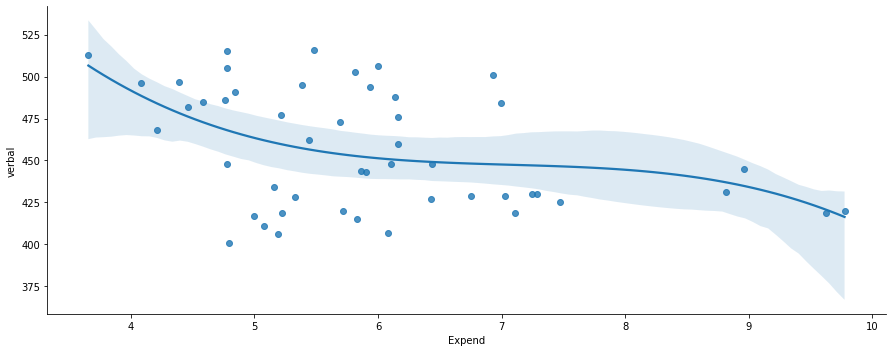

In [13]:
lm = sns.lmplot('expend', 'verbal', data=df, aspect=2.5, order=3)
lm.ax.set_xlabel('Expend')

#### Discusión:

La correlación entre el gasto (salario del maestro, gasto promedio por alumno) y el puntaje Sat, verbal, matematica mostró una correlación negativa. Reforzamos la conclusión basada en el análisis gráfico que muestra claramente que cuanto mayor es el gasto, menor es el puntaje de Sat.

##### ------------------------------------------------------------------------ Fim------------------------------------------------------------------------------------------------------

###### Por: Adilson Varela

###### Ps: la escritura fue en portugués y traducida al español con google translate